<a href="https://colab.research.google.com/github/JuanDa14Sa/Travelling-Salesman-Problem/blob/main/TSP_SimulatedAnnealing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np
import timeit

def point_circle(center_x,center_y,radius):
    theta = 2*math.pi*random.random() #Entre 0 y 2pi

    r=radius*math.sqrt(random.random())

    x = r * math.cos(theta) + center_x
    y = r * math.sin(theta) + center_y
    return x,y

def gen_points(center_x,center_y,radius,num_points):
    points=[]
    for i in range(num_points):
        x,y=point_circle(center_x,center_y,radius)
        points.append((x,y))
    return points

def dist(p1,p2):
    return math.sqrt((p1[0]-p2[0])**2+(p1[1]-p2[1])**2)

def matrix(points): 
    matrix_dist=[[dist(points[i],points[j])for j in range(len(points))] for i in range(len(points))]
    return matrix_dist

def route_len(R,matrix_dist_): 
    sum=0
    for i in range(len(R)-1):
        sum=sum+matrix_dist_[R[i]][R[i+1]]
    sum=sum+matrix_dist_[R[-1]][R[1]]
    return sum

def gen_route(num_points): 
    route=np.random.choice(range(num_points),replace=False,size=num_points)
    return route

def gen_candidatev2(solution,matrix_dist_):
    candidates = []
    tmp=np.random.choice(len(solution),replace=False,size=2)
    i=tmp[0]
    j=tmp[1]
    candidate= solution.copy()
    candidate[i] = solution[j]  
    candidate[j] = solution[i]
    candidate_eval= route_len(candidate,matrix_dist)
    return candidate, candidate_eval

def simulated_ann(n_iterations,num_points,matrix_dist_,initial_temp,step_size):
    current=gen_route(num_points)
    T=initial_temp
    values=[]
    for t in range(n_iterations):
        T=T*step_size
        next,value_next=gen_candidatev2(current,matrix_dist_)
        value_current=route_len(current,matrix_dist_)
        delta_e=value_current-value_next
        values.append(value_current)
        if delta_e>0:
            current=next
        else:
            prob=math.exp((delta_e/T))
            if random.random()< prob:
                current=next
    return current,value_current,values


num_iterations=1000
num_points=200
points=gen_points(0,0,1,num_points)
matrix_dist=matrix(points)
current,value_current,data=simulated_ann(num_iterations,num_points,matrix_dist,20,0.7)

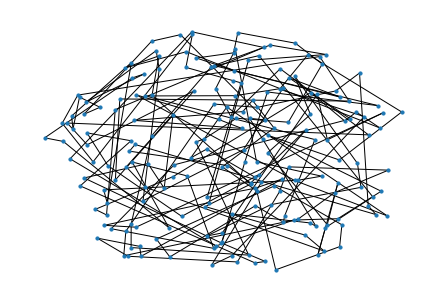

In [2]:
import networkx as nx

def plot_graph(points,route,node_size=10,width=1):
    G = nx.Graph()
    num_points=len(points)
    for i in range(num_points):
        G.add_node(i,pos=points[i])
        if i==num_points-1:
            G.add_edge(route[i],route[0])
        else:
            G.add_edge(route[i],route[i+1])

    nx.draw(G,nx.get_node_attributes(G, 'pos'),node_size=node_size,width=width)
plot_graph(points,current)


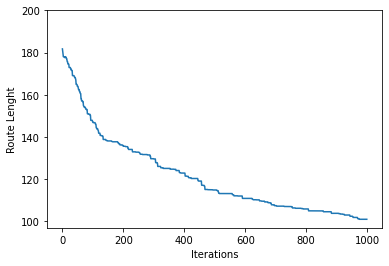

In [3]:
def plot_length(num_iterations,data):
    plt.plot(range(num_iterations),data)
    plt.ylabel('Route Lenght')
    plt.xlabel('Iterations')
    plt.ylim(top=num_points)
plot_length(num_iterations,data)

Finalmente ejecutamos el algoritmo con $100,200,500,1000,1500,2000,3000,4000,5000$ y $10000$ puntos:

In [5]:

num_iterations=100
n_=[100,200,500,1000,1500,2000,3000,4000,5000,10000]

times=[]
lengths=[]
for num_point_ in n_:
    points=gen_points(0,0,1,num_point_)
    matrix_dist=matrix(points)
    start=timeit.default_timer()
    current,value_current,data=simulated_ann(num_iterations,num_point_,matrix_dist,20,0.7)
    end=timeit.default_timer()
    times.append(end-start)
    lengths.append(value_current)

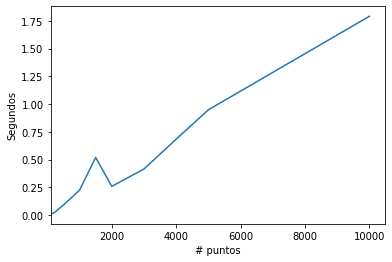

In [6]:
plt.plot(n_,times)
plt.xlim(left=100)
plt.ylabel('Segundos')
plt.xlabel('# puntos');

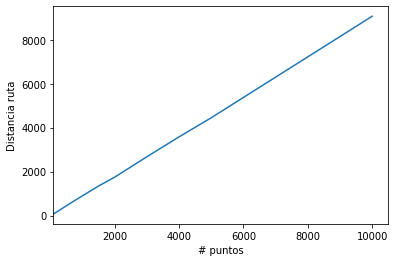

In [7]:
plt.plot(n_,lengths)
plt.xlim(left=100)
plt.xlabel('# puntos')
plt.ylabel('Distancia ruta');